# Regression with Python

We will use the library [Turicreate](https://github.com/apple/turicreate) and the dataset from Airbnb Belgium [open dataset](http://tomslee.net/airbnb-data-collection-get-the-data)

In [1]:
import turicreate as tc
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_rooms = tc.SFrame('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv')

Downloading https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv to /var/tmp/turicreate-pedrohserrano/15144/fe0fb5a6-48bc-475a-b9fa-e819c0fb3df0.csv

Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv

Parsing completed. Parsed 100 lines in 0.074704 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,int,float,int,float,float,str,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv

Parsing completed. Parsed 15711 lines in 0.032236 secs.

In [3]:
df_rooms.head()

room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
14054734,33267800,Shared room,Brussel,Brussel,1,0.0,2,1.0
16151530,105088596,Shared room,Brussel,Brussel,1,0.0,1,1.0
14678546,30043608,Shared room,Brussel,Brussel,14,4.5,2,1.0
8305401,43788729,Shared room,Namur,Namur,12,4.5,2,1.0
14904339,15277691,Shared room,Namur,Gembloux,1,0.0,6,1.0
16228753,61781546,Shared room,Antwerpen,Antwerpen,3,4.5,2,1.0
643309,3216639,Shared room,Roeselare,Roeselare,6,4.0,6,1.0
3879691,19998594,Shared room,Brugge,Knokke-Heist,1,0.0,12,1.0
3710876,18917692,Shared room,Antwerpen,Antwerpen,11,3.0,3,1.0
5141135,20676997,Shared room,Gent,Gent,9,4.5,2,1.0


In [4]:
# Make a train-test split
train_data, test_data = df_rooms.random_split(0.8)

# Automatically picks the right model based on your data.
model = tc.boosted_trees_regression.create(train_data, target='price',
                                    features = ['room_type',
                                                'borough',
                                                'neighborhood',
                                                'reviews',
                                               'overall_satisfaction',
                                               'accommodates',
                                               'bedrooms'], max_iterations=10)

# Save predictions to an SArray
predictions = model.predict(test_data)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(test_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 11988

Number of features          : 7

Number of unpacked features : 7

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.015538     | 1653.675049        | 636.694641           | 98.718658     | 86.953232       |

| 2         | 0.023833     | 1405.623779        | 532.724304           | 82.025909     | 71.237007       |

| 3         | 0.032078     | 1194.780151        | 493.309814           | 71.825134     | 61.137695       |

| 4         | 0.043177     | 1015.563110        | 444.898193           | 65.255905     | 55.089993       |

| 5         | 0.051157     | 923.794189         | 428.602875           | 61.203358     | 52.486366       |

| 6         | 0.058994     | 918.948425         | 403.777435           | 58.821861     | 50.565437       |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

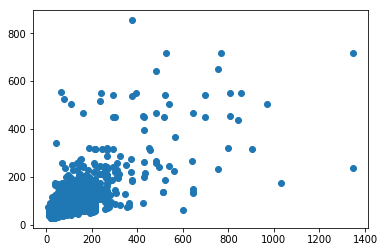

In [5]:
plt.scatter(test_data['price'], predictions)

In [13]:
test_data[0]

{'accommodates': 2,
 'bedrooms': 1.0,
 'borough': 'Brussel',
 'host_id': 30043608,
 'last_modified': '2016-12-31 14:49:05.110143',
 'latitude': 50.847657,
 'longitude': 4.348675,
 'minstay': '',
 'neighborhood': 'Brussel',
 'overall_satisfaction': 4.5,
 'price': 43.0,
 'reviews': 14,
 'room_id': 14678546,
 'room_type': 'Shared room'}

In [14]:
predict = model.predict(test_data[0])

In [16]:
print('Prediction of the room: {}'.format(predict[0]))

Prediction of the room: 50.32513427734375


# Exercices
---

## Correlation and t-Test

In [17]:
import numpy as np
import scipy.stats as stats

In [18]:
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

#Pearson Correlation r 
cor, pval = stats.pearsonr(x, y)
print("Pearson Correlation r , cor: %.4f, pval: %.4f" % (cor, pval))

# Non-Parametric Spearman
cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))

Pearson Correlation r , cor: 0.8447, pval: 0.0000
Non-Parametric Spearman cor test, cor: 0.8319, pval: 0.0000


In [19]:
#t-Test Independency
nx, ny = 50, 25
x = np.random.normal(loc=1.76, scale=0.1, size=nx)
y = np.random.normal(loc=1.70, scale=0.12, size=ny)
tval, pval = stats.ttest_ind(x, y, equal_var=True)
print("t-Test Independency, tval: %.4f, pval: %.4f" % (tval, pval))

t-Test Independency, tval: 1.8070, pval: 0.0749
